<a href="https://colab.research.google.com/github/K-osA/2022S-ML/blob/main/HW3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [10]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 불러오기

In [12]:
import numpy as np
import pandas as pd

In [13]:
path = 'drive/MyDrive/heart_clean.csv' # 제공된 csv 파일 사용
df = pd.read_csv(path)

In [14]:
df.head()

,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
0,53,120,0,0,0.0,0
1,65,134,0,1,1.1,1
2,60,160,0,1,0.5,1
3,57,150,1,0,0.2,0
4,57,150,0,1,0.6,1


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (568, 5)
y_train's shape :  (568,)

X_val's shape :  (71, 5)
y_val's shape :  (71,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)




---



## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



X_train's shape :  (568, 5)
y_train's shape :  (568,)

X_val's shape :  (71, 5)
y_val's shape :  (71,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)


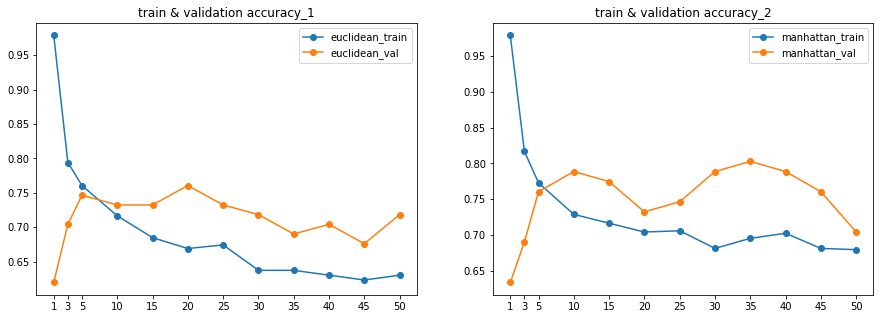

test accuracy:  0.704225352112676


In [16]:
### 문제 1 ###
## 코드 작성 ##

# 데이터 나누기 및 shape 출력
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=78) # train 90%, test 10%, seed 고정.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=78) # test까지 봤을 때 train 80%, val 10%, test 10%

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

x_values = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] # 후보 k값 준비

# 각 종류별 리스트 만들기
y_values_euclidean_train = []
y_values_manhattan_train = []
y_values_euclidean_val = []
y_values_manhattan_val = []

for k in [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean") # euclidean과 반복되는 k에 대한 classifier 생성
    knn.fit(X_train, y_train)
    y_values_euclidean_train.append(knn.score(X_train, y_train)) # train set에 대한 score를 리스트에 추가
    y_values_euclidean_val.append(knn.score(X_val, y_val)) # val set에 대한 score를 리스트에 추가

    knn = KNeighborsClassifier(n_neighbors=k, metric="manhattan") # manhattan과 반복되는 k에 대한 classifier 생성
    knn.fit(X_train, y_train)
    y_values_manhattan_train.append(knn.score(X_train, y_train)) # train set에 대한 score를 리스트에 추가
    y_values_manhattan_val.append(knn.score(X_val, y_val)) # val set에 대한 score를 리스트에 추가

# 각 종류별로 plot 찍기 및 준비 과정 후 출력
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("train & validation accuracy_1")
plt.plot(x_values, y_values_euclidean_train, marker='o', label="euclidean_train")
plt.plot(x_values, y_values_euclidean_val, marker='o', label="euclidean_val")
plt.xticks(x_values)
plt.legend()

plt.subplot(122)
plt.title("train & validation accuracy_2")
plt.plot(x_values, y_values_manhattan_train, marker='o', label="manhattan_train")
plt.plot(x_values, y_values_manhattan_val, marker='o', label="manhattan_val")
plt.xticks(x_values)
plt.legend()

plt.show()

knn = KNeighborsClassifier(n_neighbors=35, metric="manhattan") # 최적의 k값 35, manhattan에 대한 classifier 생성
knn.fit(X_train, y_train)
print("test accuracy: ", knn.score(X_test, y_test)) # 최종 결과 출력

**설명 작성**  
- 최적의 파라미터: k가 35일 때, manhattan으로 거리를 계산한 것.
- 설명: k값을 1, 3, 5부터 5단위로 50까지 두고 euclidean과 manhattan 거리를 각각 계산한 후, plot을 찍은 결과 k=35, manhattan에서 가장 validation accuracy가 높게 나왔습니다. 그러므로 이것이 최적의 파라미터라고 보았습니다. 마지막으로 이 파라미터를 사용하여 도출된 test accuracy는 약 70.4%입니다.



---



## 문제2 SVM


- Scikit-learn 라이브러리를 이용하여 SVM의 최적의 파라미터를 찾는다.
    - Kernel trick 중 최소 두개를 비교한다.
    - 최적의 파라미터 C값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 C값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.


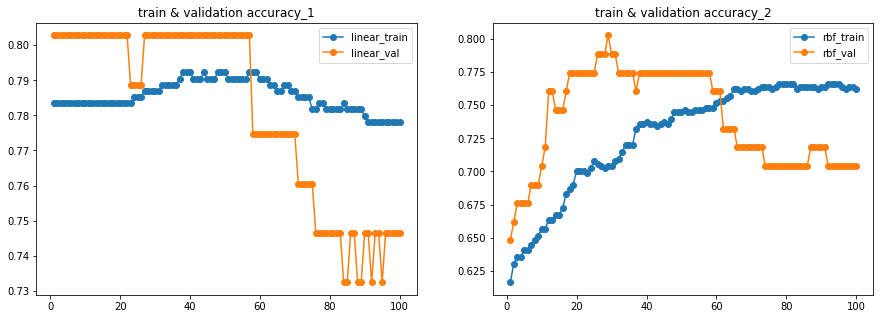

test accuracy:  0.8873239436619719


In [17]:
### 문제 2 ###
## 코드 작성 ##
from sklearn.svm import SVC
import matplotlib.pyplot as plt

x_values = [x for x in range(1, 101)] # 후보 C값 준비

# 각 종류별 리스트 만들기
y_values_linear_train = []
y_values_rbf_train = []
y_values_linear_val = []
y_values_rbf_val = []

for c in range(1, 101):
    svm = SVC(kernel='linear', C=c) # linear와 반복되는 c에 대한 classifier 생성
    svm.fit(X_train, y_train)
    y_values_linear_train.append(svm.score(X_train, y_train)) # train set에 대한 score를 리스트에 추가
    y_values_linear_val.append(svm.score(X_val, y_val)) # val set에 대한 score를 리스트에 추가

    svm = SVC(kernel='rbf', C=c) # rbf와 반복되는 c에 대한 classifier 생성
    svm.fit(X_train, y_train)
    y_values_rbf_train.append(svm.score(X_train, y_train)) # train set에 대한 score를 리스트에 추가
    y_values_rbf_val.append(svm.score(X_val, y_val)) # val set에 대한 score를 리스트에 추가

# 각 종류별로 plot 찍기 및 준비 과정 후 출력
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title("train & validation accuracy_1")
plt.plot(x_values, y_values_linear_train, marker='o', label="linear_train")
plt.plot(x_values, y_values_linear_val, marker='o', label="linear_val")
plt.legend()

plt.subplot(122)
plt.title("train & validation accuracy_2")
plt.plot(x_values, y_values_rbf_train, marker='o', label="rbf_train")
plt.plot(x_values, y_values_rbf_val, marker='o', label="rbf_val")
plt.legend()

plt.show()

svm = SVC(kernel="linear", C=50) # 최적의 C값 50, linear에 대한 classifier 생성
svm.fit(X_train, y_train)
print("test accuracy: ", svm.score(X_test, y_test))

**설명 작성**  
- 최적의 파라미터: kernel이 linear이고, C값은 0부터 22, 27부터 57.  / kernel이 rbf이고, C값이 29.
- 설명: C값을 1에서 100으로 두고 kernel을 linear와 rbf로 각각 계산한 후, plot을 찍은 결과 C=0에서 22, 27에서 57, linear / C=29, rbf에서 가장 validation accuracy가 높고 같게 나왔습니다. 그러므로 이것이 최적의 파라미터라고 보았습니다. 마지막으로 최적의 파라미터들 중, C값을 50으로 설정하여, linear를 사용하여 도출된 test accuracy는 약 88.7%입니다.



---



## 문제3 Cross validation with Random Forest
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

X_train's shape :  (639, 5)
y_train's shape :  (639,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


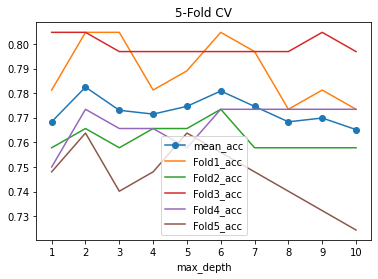

0.8591549295774648


In [18]:
### 문제 3-1 ###
## 코드 작성 ##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=78) # train 90%, test 10%, seed 고정.

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import tqdm

temp = []
kfold = KFold(n_splits=5) # 5-fold에 대해 instance 생성

max_depth_value = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # 후보 max_depth 준비
fold = [[] for _ in range(5)] # mean_fold 계산을 위한 이중 리스트 생성
mean_fold = []
i = 0
for mdv in tqdm.tqdm(max_depth_value):
    rfc = RandomForestClassifier(max_depth=mdv, random_state=78) # max_depth에 대한 classifier 생성, seed 고정.

    for temp_train_index, temp_test_index in kfold.split(X_train): # 각 fold별 지정된 index 설정 및 반복
        X_temp_train, X_temp_test = X_train.iloc[temp_train_index], X_train.iloc[temp_test_index] # 지정된 fold에 대한 index을 따서 또 하나의 train, test(val) set 생성
        y_temp_train, y_temp_test = y_train.iloc[temp_train_index], y_train.iloc[temp_test_index]

        rfc.fit(X_temp_train, y_temp_train)

        fold[i].append(rfc.score(X_temp_test, y_temp_test)) # 지정된 fold에 대한 score 삽입
        i += 1
    i = 0

mean_fold.append(np.mean(fold, axis=0)) # fold별 mean값 구해서 삽입
plt.plot([x for x in range(1, 11)], mean_fold[0], label='mean_acc', marker='o') # hyperparameter 10개에 대한 mean값 찍기
for i in range(5):
    plt.plot([x for x in range(1, 11)], fold[i], label='Fold' + str(i + 1) + '_acc') # fold별 hyperparameter 10개에 대해 나온 값 찍기
plt.title("5-Fold CV")
plt.xticks(max_depth_value)
plt.xlabel("max_depth")
plt.legend()
plt.show()

rfc = RandomForestClassifier(max_depth=2, random_state=78) # 최적의 파라미터에 대한 classifier 만들기
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test)) # 최종 결과 출력

**설명 작성**  
- test accuracy: 0.859154.. 약 85.9%
- 최적의 파라미터: max_depth=2.
- 설명: 입력할 수 있는 파라미터들 중 max_depth를 1~10 중 최적 하나를 고르기 위한 작업을 하였습니다. 각 Fold에 대해 정확도를 구한 후, 그래프로 그리고 column, 즉 max_depth값 기준으로 평균을 매겨 그래프를 하나 더 그렸습니다. 그러면 mean_acc이 가장 높은게 최적이므로 그 값을 적용시킨 후, validation으로 사용하던 set까지 train 시킨 후, 최종 정확도를 구했습니다.



100%|██████████| 10/10 [18:08<00:00, 108.82s/it]


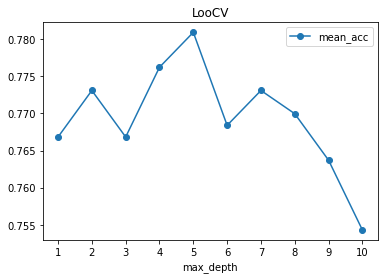

0.8873239436619719


In [19]:
### 문제 3-2 ###
## 코드 작성 ##
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut

temp = []
loo = LeaveOneOut() # LeaveOneOut에 대해 instance 생성

max_depth_value = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] # 후보 max_depth 준비
sum = 0
mean_fold = []
for mdv in tqdm.tqdm(max_depth_value):
    rfc = RandomForestClassifier(max_depth=mdv, random_state=78) # max_depth에 대한 classifier 생성, seed 고정.

    for temp_train_index, temp_test_index in loo.split(X_train): # 각 fold별 지정된 index 설정 및 반복
        X_temp_train, X_temp_test = X_train.iloc[temp_train_index], X_train.iloc[temp_test_index] # 지정된 fold에 대한 index을 따서 또 하나의 train, test(val) set 생성
        y_temp_train, y_temp_test = y_train.iloc[temp_train_index], y_train.iloc[temp_test_index]

        rfc.fit(X_temp_train, y_temp_train)

        sum += rfc.score(X_temp_test, y_temp_test) # 한번 반복마다 score를 합산.
    mean_fold.append(sum / (len(X_train))) # X_train의 길이가 fold 갯수이므로 이것으로 mean값 도출.
    sum = 0

plt.plot([x for x in range(1, 11)], mean_fold, label='mean_acc', marker='o') # hyperparameter 10개에 대해 mean_acc 찍기
plt.title("LooCV")
plt.xticks(max_depth_value)
plt.xlabel("max_depth")
plt.legend()
plt.show()

rfc = RandomForestClassifier(max_depth=5, random_state=78) # 최적의 파라미터에 대한 classifier 만들기
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test)) # 최종 결과 출력

**설명 작성**  
- test accuracy: 0.887323.. 약 88.7%
- 최적의 파라미터: max_depth=5
- 설명: Leave-one-out은 train하고자 하는 value 개수만큼 fold됩니다. train_data는 총 639개이므로, 6390번의 train이 이루어졌으며(639*max_depth_value 10개) 그래프 상에서는 max_depth가 5인것의 mean이 가장 높게 나왔기에, 이것이 최적인 것으로 보았고 K-Fold와 같이 validation으로 사용하던 set도 train으로 하여 다시 학습시킨 후, test_set의 정확도를 구하였습니다.



---



## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [20]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [21]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [22]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [23]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Pearson Correlation
- seaborn 패키지를 사용하여 pearson correlation heatmap을 그린다.
- heatmap을 확인한 후 각 feature들 간 어떠한 관계가 있는지 아래의 텍스트 셀에 서술한다.    
- target과 연관성이 높은 feature의 column들을 아래의 텍스트 셀에 기술한다.
- 기술한 columns들과 target column을 포함하여 DataFrame을 만들고 **이후 모든 문제에서는 이 DataFrame을 사용한다**.

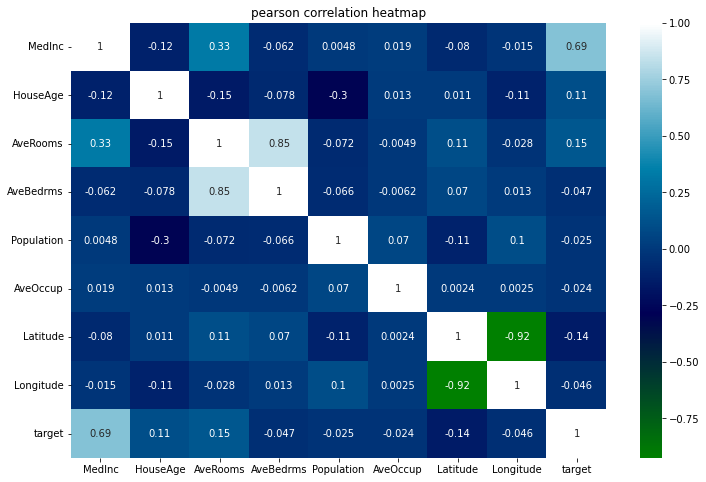

In [24]:
### 문제 4-1 ###
# correlation map 작성 후 plot
import seaborn as sns

plt.figure(figsize=(12, 8)) # figure set
plt.title("pearson correlation heatmap")
sns.heatmap(df.corr(), annot=True, cmap='ocean') # heatmap 그리기
plt.show()

- **Feature들 간 관계 서술**  
  답: 상관계수는 -1~1로 정의되며, 1에 가까울수록 positively correlated이고, -1에 가까울수록 negatively correlated입니다. 0에 가까우면 not correlated입니다. 즉 순서대로 보았을 때, 같은 방향으로 움직이는 경향, 반대 방향으로 움직이는 경향, 마지막으로 상관관계가 거의 없는것으로 볼 수 있습니다. 자신과 자신은 같기 때문에 1입니다.

- **최종 선택한 feature들**  
  답: 앞서 답변한 것을 토대로 보았을 때 저는 target에 대해 0에서 최소한 +-0.1이상 떨어져있는 feature들을 골랐습니다. 그러면 Medinc(0.69), AveRooms(0.15), HouseAge(0.11), Latitude(-0.14)가 선택됩니다.

In [25]:
### 문제 4-1 ###
# 새 dataframe 만들기
new_df = df[['target', 'MedInc', 'AveRooms', 'HouseAge', 'Latitude']] # 선택한 feature들에 대해 dataframe 생성
print(new_df)

       target  MedInc  AveRooms  HouseAge  Latitude
0       4.526  8.3252  6.984127      41.0     37.88
1       3.585  8.3014  6.238137      21.0     37.86
2       3.521  7.2574  8.288136      52.0     37.85
3       3.413  5.6431  5.817352      52.0     37.85
4       3.422  3.8462  6.281853      52.0     37.85
...       ...     ...       ...       ...       ...
20635   0.781  1.5603  5.045455      25.0     39.48
20636   0.771  2.5568  6.114035      18.0     39.49
20637   0.923  1.7000  5.205543      17.0     39.43
20638   0.847  1.8672  5.329513      18.0     39.43
20639   0.894  2.3886  5.254717      16.0     39.37

[20640 rows x 5 columns]


### 문제 4-2: MSE, r2 score
- Scikit-learn 라이브러리의 LinearRegression 모델을 사용한다.
- train data는 test data를 제외한 **90%의 데이터를 사용**해야한다.
- **Mean Square Error(MSE)**와 **r2 score**를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.
- Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 텍스트 셀에 서술한다.

In [26]:
### 문제 4-2 ###
## 코드 작성 ##
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = new_df.drop('target', axis=1) # target drop
y = new_df['target'] # target은 label.
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=55) # train 90%, test 10%, seed 고정.

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

lr = LinearRegression() # LinearRegression instance 생성
lr.fit(X_train, y_train)

mse_train = mean_squared_error(y_train, lr.predict(X_train)) # train set에 대한 mse 구하기
mse_test = mean_squared_error(y_test, lr.predict(X_test)) # test set에 대한 mse 구하기
r2_train = r2_score(y_train, lr.predict(X_train)) # train set에 대한 r2_score 구하기
r2_test = r2_score(y_test, lr.predict(X_test)) # test set에 대한 r2_score 구하기

# 결과 출력
print("\ntrain's Mean Square Error: ", mse_train)
print("test's Mean Square Error: ", mse_test)

print("\ntrain's r2 score: ", r2_train)
print("test's r2 score: ", r2_test)


X_train's shape :  (18576, 4)
y_train's shape :  (18576,)

X_test's shape :  (2064, 4)
y_test's shape :  (2064,)

train's Mean Square Error:  0.6346601750091023
test's Mean Square Error:  0.6933824633740008

train's r2 score:  0.523918372397667
test's r2 score:  0.473647135291113


**Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 서술**   
답: overfit입니다. MSE는 높을수록 좋지 않은 것이며, 이와 반대로 R2 Score는 높을수록 좋은 것입니다. 그런데 train의 MSE와 r2 score가 모두 test와 비교했을 때 좋은 값이 나왔습니다. 즉, 오히려 test set에 대해 더 좋지 않은 값이 나왔기에 이렇게 판단하였습니다.

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,10]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [27]:
### 문제 4-3 ###
## 코드 작성 ##
from sklearn.linear_model import Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=55) # train 90%, test 10%, 같은 seed
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=55) # test까지 봤을 때 train 80%, val 10%, test 10%

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

# 리스트 준비
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10]
ridge_alphas_r2 = []
lasso_alphas_r2 = []

for a in alpha:
    ridge = Ridge(alpha=a) # 반복되는 a(alpha)에 대한 Ridge instance 생성
    lasso = Lasso(alpha=a) # 반복되는 a(alpha)에 대한 Lasso instance 생성
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    ridge_alphas_r2.append(r2_score(y_val, ridge.predict(X_val))) # val set에 대한 ridge_r2_score 리스트에 추가
    lasso_alphas_r2.append(r2_score(y_val, lasso.predict(X_val))) # val set에 대한 lasso_r2_score 리스트에 추가

X_train's shape :  (16512, 4)
y_train's shape :  (16512,)

X_val's shape :  (2064, 4)
y_val's shape :  (2064,)

X_test's shape :  (2064, 4)
y_test's shape :  (2064,)


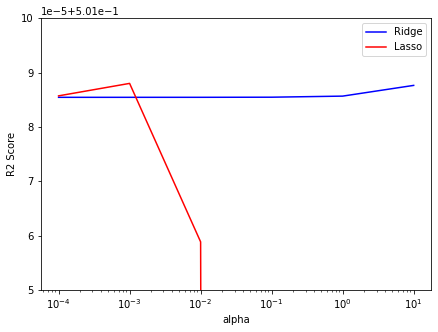

In [28]:
### 문제 4-3 ###
## 그래프 작성 ##
plt.figure(figsize=(7, 5))
plt.plot(alpha, ridge_alphas_r2, label='Ridge', color='blue')
plt.plot(alpha, lasso_alphas_r2, label='Lasso', color='red')
plt.xlabel('alpha')
plt.ylabel('R2 Score')

# 그래프의 가시성을 위한 설정
plt.xscale('log')
plt.ylim([0.50105, 0.5011])
plt.xticks(alpha)

plt.legend()
plt.show()

- Ridge regression 모델 최적의 alpha 값: 10
- Lasso regression 모델 최적의 alpha 값: 0.001

In [29]:
### 문제 4-3 ###
# 최종 결과 출력
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=55) # 같은 seed로 split(이전과 같은 set 생성)

# 최적의 alpha에 대한 instance 생성
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=0.001)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

print("Ridge_r2 score: ", r2_score(y_test, ridge.predict(X_test))) # 최종 ridge_r2_score 출력
print("Lasso_r2 score: ", r2_score(y_test, lasso.predict(X_test))) # 최종 lasso_r2_score 출력

Ridge_r2 score:  0.47365127607875224
Lasso_r2 score:  0.47365620964754696
